In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [2]:
data=pd.read_csv('ResearchData.csv')
data.head()

,year,month,day,time,dayInWeek,duration,startLat,startLog,endLat,endLog,distance
0,2019,10,8,19,3,3,38.257,-85.748,38.256,-85.746,0.04
1,2019,4,13,13,7,1,38.251,-85.758,38.251,-85.758,0.04
2,2019,4,28,8,1,1,38.254,-85.757,38.254,-85.757,0.04
3,2019,2,15,23,6,3,38.222,-85.761,38.221,-85.761,0.04
4,2019,1,1,12,3,1,38.243,-85.725,38.243,-85.725,0.04


In [3]:
data.isna().sum()

year         0
month        0
day          0
time         0
dayInWeek    0
duration     0
startLat     0
startLog     0
endLat       0
endLog       0
distance     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395702 entries, 0 to 395701
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       395702 non-null  int64  
 1   month      395702 non-null  int64  
 2   day        395702 non-null  int64  
 3   time       395702 non-null  int64  
 4   dayInWeek  395702 non-null  int64  
 5   duration   395702 non-null  int64  
 6   startLat   395702 non-null  float64
 7   startLog   395702 non-null  float64
 8   endLat     395702 non-null  float64
 9   endLog     395702 non-null  float64
 10  distance   395702 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 33.2 MB


In [5]:
X = np.array(data).astype(float)

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
scaled_data[:5]

array([[ 0.35229451,  0.99384503, -0.85190767,  1.11187231, -0.63045343,
        -0.62297008,  0.45331088,  0.02448044,  0.08676513,  0.00457619,
        -1.03538867],
       [ 0.35229451, -1.13802911, -0.28674139, -0.19091544,  1.31830811,
        -0.73079577,  0.28981035, -0.11702632,  0.06098679, -0.02137041,
        -1.03538867],
       [ 0.35229451, -1.13802911,  1.40875747, -1.2765719 , -1.6048342 ,
        -0.73079577,  0.37156061, -0.10287565,  0.07645379, -0.01920819,
        -1.03538867],
       [ 0.35229451, -1.84865382, -0.06067487,  1.98039747,  0.83111773,
        -0.62297008, -0.50044221, -0.15947835, -0.09368326, -0.02785706,
        -1.03538867],
       [ 0.35229451, -2.20396618, -1.64314047, -0.40804673, -0.63045343,
        -0.73079577,  0.07180965,  0.34994599,  0.01974144,  0.04998275,
        -1.03538867]])

In [8]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [9]:
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

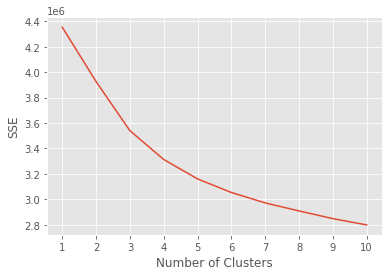

In [10]:
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

In [13]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_data)


KMeans(init='random', n_clusters=4, random_state=42)

In [14]:
kmeans.inertia_


3313128.6346311485

In [15]:
kmeans.cluster_centers_


array([[ 2.21894992e-01, -2.43698795e-01, -2.82013190e-03,
         2.47723178e-01, -1.47737417e-02,  1.52474364e+00,
         1.64106836e-01,  5.42826386e-02,  3.22603010e-02,
         8.63581851e-04,  1.82768578e+00],
       [-2.38025294e+00,  1.09660338e+00,  2.36772737e-02,
         9.75709030e-02, -4.75527977e-02, -1.24311532e-01,
         5.89929965e-02,  4.12915487e-02,  1.45380947e-02,
         5.33893865e-03, -6.23946248e-02],
       [ 4.30418576e-01, -6.50692178e-01,  2.73549375e-01,
        -8.38343803e-01, -1.59893586e-01, -3.16491817e-01,
        -1.51060188e-01, -3.56917392e-02, -3.72423161e-02,
         1.97824395e-03, -3.55546762e-01],
       [ 3.57517312e-01,  2.68391724e-01, -2.37410588e-01,
         5.82496972e-01,  1.56154512e-01, -2.51388510e-01,
         4.71414838e-02, -3.76864158e-03,  1.46348818e-02,
        -3.78192304e-03, -3.50581149e-01]])